# Loading Libraries
Let us begin our analysis by loading the above mentioned Python Modules/Packages/Libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (14, 8)

# Reading input dataset

In [3]:
matches = pd.read_csv('matches.csv')
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Get basic information of Data

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets,umpire3
count,636.000000,636.000000,636.000000,636.000000,636.000000,0.0
mean,318.500000,2012.490566,0.025157,13.682390,3.372642,NaN
std,183.741666,2.773026,0.156726,23.908877,3.420338,NaN
min,1.000000,2008.000000,0.000000,0.000000,0.000000,NaN
25%,159.750000,2010.000000,0.000000,0.000000,0.000000,NaN
50%,318.500000,2012.000000,0.000000,0.000000,4.000000,NaN
75%,477.250000,2015.000000,0.000000,20.000000,7.000000,NaN
max,636.000000,2017.000000,1.000000,146.000000,10.000000,NaN


In [6]:
matches.shape

(636, 18)

## How many matches we’ve got in the dataset?
As we’ve seen above, id is a variable that counts each observation in the data while each observation is a match.So to get the number of matches in our dataset is as same as to get the number of rows in the dataset or maximum value of the variable id.

In [8]:
matches['id'].max()

636

## How many seasons we’ve got in the dataset?
IPL like any other Sports league, happens once in a year and so getting the number of unique years we’ve got in the dataset will tell us how many seasons we’ve got in the dataset.

In [10]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

In [11]:
matches['season'].nunique()

10

## Which Team had won by maximum runs?
To answer this question, we can divide the question logically — first we need to find maximum runs, then we can find the row (winning team) with this maximum runs — which would indeed be the team won by maximum runs.

In [23]:
matches['win_by_runs'].max()

146

In [24]:
matches[matches['win_by_runs'] == 146]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan,NaN


In [25]:
matches.iloc[matches['win_by_runs'].idxmax()]['winner']

'Mumbai Indians'

## Which Team had won by maximum wickets?

In [26]:
matches.iloc[matches['win_by_wickets'].idxmax()]['winner']

'Kolkata Knight Riders'

## Which Team had won by (closest margin) minimum runs?
**To know the team that was won by the closest margin, we have to do the opposite of what we’ve done in the above steps. But there’s a caveat in that. In Cricket, if the team that’s batting second wins the match (by chasing), it’ll be said “Team second won by x number of wickets” and if the team that’s bowling second (batted first) wins the match (by defending their score), it’ll be said “Team first won by x number of runs”. Hence, the minimum win by runs will always be 0 and the minimum win by wickets will also always be 0 in a tournament since sometimes chasing team or sometimes the team that batted first could win. To overcome this caveat, we just have to apply a simple workaround as you can see below.**

In [27]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]['winner']

'Mumbai Indians'

## Which Team had won by minimum wickets?
Going by the same logic as above:

In [28]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]['winner']

'Kolkata Knight Riders'

* ***To advance further in our quest to understand the process of Data analysis in Python, let us answer further questions with Data Visulization i.e., by plotting the result.***

## Which season had most number of matches?

We know that if each row is a match, then counting the number of instances/rows of every season would give us the number of matches for every season.

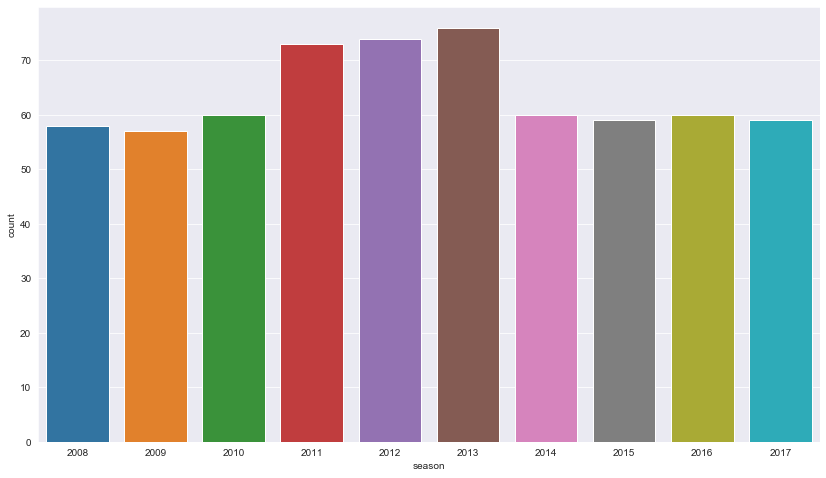

In [29]:
sns.countplot(x = 'season', data=matches)
plt.show()

## The most successful IPL Team

The most successful IPL team is the team that has won most number of times. Which also means, answer it to this is as same as the above exercise except counting the number of instances in each season, here we’ve to count the number of instances in each winning team.

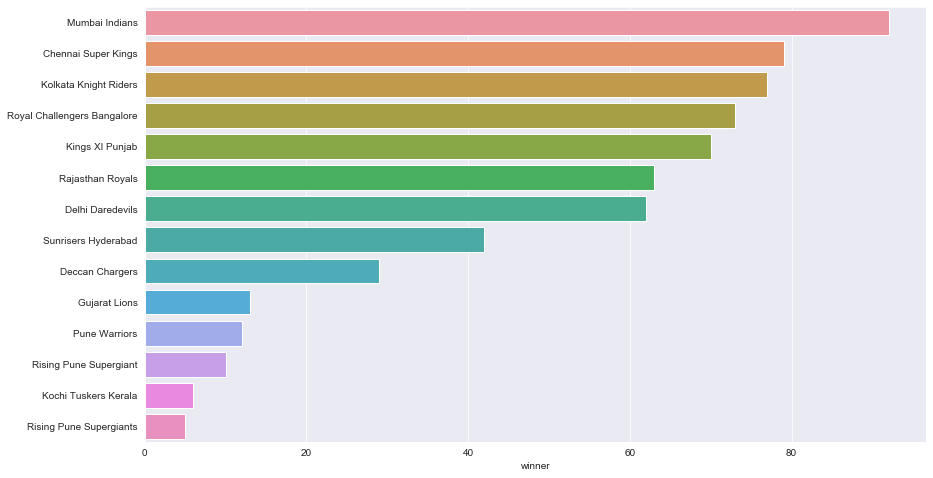

In [34]:
# sns.countplot(y='winner', data=matches)
# plt.show()
data = matches.winner.value_counts()
sns.barplot(y= data.index, x=data, orient='h');

## Top player of the match Winners

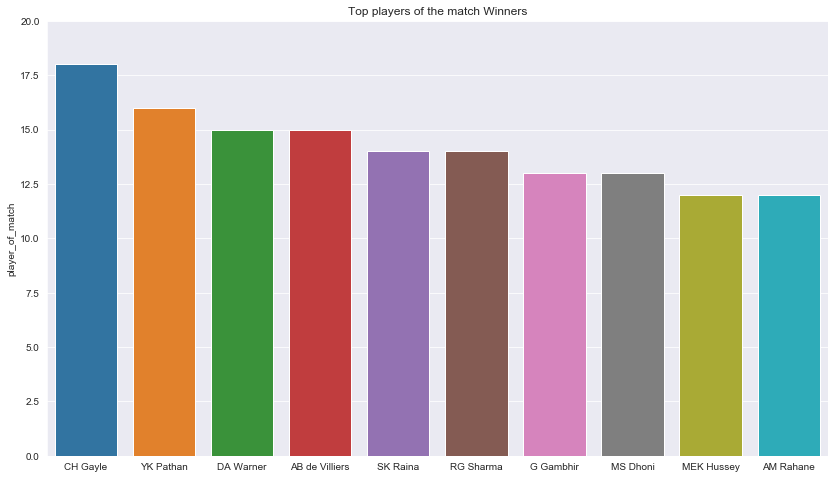

In [35]:
top_players = matches.player_of_match.value_counts()[:10]
fig, ax = plt.subplots()
ax.set_ylim([0, 20])
ax.set_ylabel('Count')
ax.set_title('Top players of the match Winners')
sns.barplot(x=top_players.index, y=top_players, orient='v')
plt.show()

## Has Toss-winning helped in Match-winning?

* **Having solved those not-so-tough questions above, we are nowhere to extract a critical insight — which is — Has winning toss actually helped in winning the match?**

* **Using our same approach of dividing our problem into chunks — we can separate this question into two — match winner and toss winner if both of them are same — then it’s a success and if not it’s a failure. Before visualizing the outcome, let us first see how the numbers look.**

In [36]:
ss = matches['toss_winner'] == matches['winner']
ss.groupby(ss).size()

False    311
True     325
dtype: int64

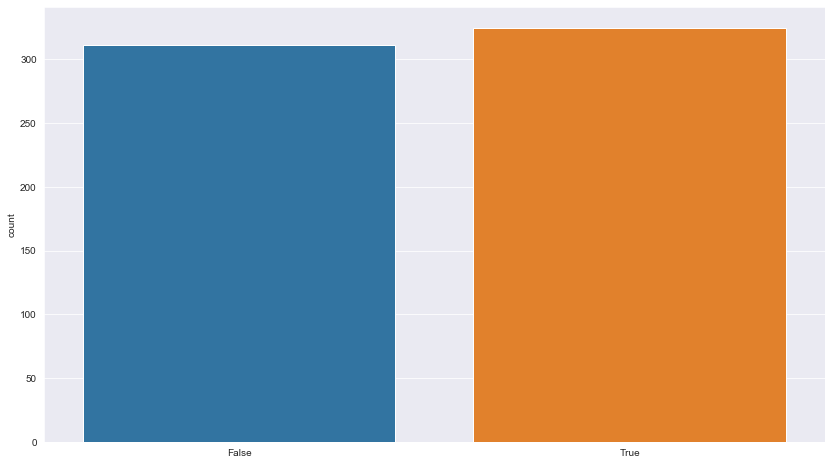

In [37]:
sns.countplot(ss)

***Looks like, Toss winning actually helps in Match winning — or to be statistically right, we could say there’s a correlation between Toss Winning and Match Winning and so we can assume that it helps.***

# The End !